In [14]:
'''
  Import Package
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

import warnings; warnings.filterwarnings("ignore")

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
'''
  Load Processed Test Data
'''
test = pd.read_csv('/content/drive/MyDrive/ML/Project/X_test.csv')
print(test.shape)
test.head()

(20775, 30)


id product_code   loading  attribute_0 attribute_1  attribute_2  \
0  26570            F  4.783902     -0.07464  material_6            6   
1  26571            F  4.731891     -0.07464  material_6            6   
2  26572            F  4.719926     -0.07464  material_6            6   
3  26573            F  4.724907     -0.07464  material_6            6   
4  26574            F  5.337538     -0.07464  material_6            6   

   attribute_3  measurement_0  measurement_1  measurement_2  ...  \
0            4            6.0            9.0            6.0  ...   
1            4           11.0            8.0            0.0  ...   
2            4            8.0           12.0            4.0  ...   
3            4            8.0           11.0           10.0  ...   
4            4           14.0           16.0            8.0  ...   

   measurement_13  measurement_14  measurement_15  measurement_16  \
0          13.659          16.825          13.742          17.710   
1          17.468          16.708          14.776          14.102   
2          13.363          15.737          17.065          16.021   
3          15.501          15.667          12.620          16.111   
4          16.070          16.183          13.324          17.150   

   measurement_17  m_3_missing  m_5_missing  area  measurement_avg  \
0         634.612            0            0    24        15.423286   
1         537.037            0            0    24        15.223815   
2         658.995            0            0    24        15.259429   
3         594.301            0            0    24        14.892357   
4         801.044            0            0    24        15.430714   

   m_3_5_missing  
0              0  
1              0  
2              0  
3              0  
4              0  

[5 rows x 30 columns]

In [17]:
selected_cols = [
    'loading',
    'attribute_0',
    'measurement_17',
    'measurement_0',
    'measurement_1',
    'measurement_2',
    'area',
    'm_3_missing',
    'm_5_missing',
    'measurement_avg',
#    'measurement_stddev',
    'm_3_5_missing'
]

In [18]:
'''
  Normalize
'''
scaler = StandardScaler()
#scaler = RobustScaler()
#scaler = MinMaxScaler()
#X_scaled = scaler.fit_transform(X[selected_cols])
X_test = scaler.fit_transform(test[selected_cols])

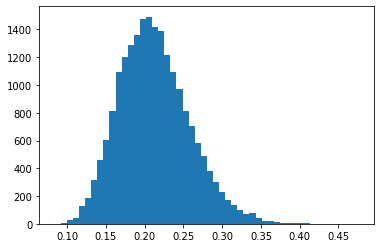

In [21]:
'''
  Load the trained model saved and Predict Probability
'''
lr_test = np.zeros(len(test))
import joblib
path = '/content/drive/MyDrive/ML/Project/model'
for key in [0, 1, 2, 3, 4]:
  model = joblib.load(f'{path}{key}.sav')
  lr_test += model.predict_proba(X_test)[:, 1] / 5
plt.hist(lr_test, bins=50)
plt.show()

In [20]:
'''
Submission
'''
submission = pd.read_csv('/content/drive/MyDrive/ML/Project/sample_submission.csv')
submission.failure = lr_test
submission.to_csv("0816201.csv", index=False)
submission

id   failure
0      26570  0.199005
1      26571  0.178182
2      26572  0.187822
3      26573  0.192559
4      26574  0.305033
...      ...       ...
20770  47340  0.244260
20771  47341  0.145429
20772  47342  0.141649
20773  47343  0.225649
20774  47344  0.166589

[20775 rows x 2 columns]